# 149900 ICS A LAB 2

Importing needed libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

Importing the data

In [4]:
data = pd.read_csv("../data/data.csv")
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,y
0,-0.105716,-1.056372,0.472175,-0.624175,-1.337268,0.109321,0.293656,0.635470,-0.871020,0.194277,...,0.101041,0.708435,1.343249,-1.202234,-1.333481,-0.888842,0.134859,0.355681,-1.193989,180.621931
1,1.255322,0.125270,0.450023,2.003561,0.277094,0.450579,0.462558,-0.316563,0.052639,0.188200,...,-0.638715,0.407518,1.452270,-1.047522,0.697560,0.335719,-2.483643,0.396654,-1.337587,8.336719
2,0.655216,0.825484,-0.890328,0.105923,-0.627933,1.788487,-0.338370,-0.601686,-0.837622,-0.085283,...,0.108930,1.120339,-0.557336,0.542774,-2.099880,0.766930,-0.640871,0.607291,0.593155,178.514922
3,-0.862742,-0.297754,0.316790,-2.747953,-0.468321,1.168713,-0.639897,0.602207,-0.390683,-0.279624,...,1.174023,-0.597059,-0.768229,-1.508851,-1.563351,0.824011,1.152560,0.288155,0.428682,233.401328
4,-0.492418,0.832162,-0.704394,-0.502445,0.734592,-0.435019,-0.017912,-1.992973,-0.129440,1.429077,...,1.123942,2.143922,2.052964,0.224794,1.871673,-0.728549,-1.876174,-1.169126,1.209643,-98.768226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.935345,-0.692987,-0.832397,-2.498640,2.261659,1.367322,0.515830,0.506786,1.035609,-0.325418,...,1.671802,2.286782,-1.714992,-1.444627,-1.581214,0.280769,-0.617830,0.439948,-0.714918,-65.040934
1496,-0.244098,0.060273,0.125432,-2.039433,-1.157703,-0.655560,-0.946333,0.722567,-0.783650,-0.255913,...,0.836461,0.809415,0.868936,-0.796776,-0.057393,0.061941,-0.790014,0.878913,-1.694412,-132.949835
1497,0.289568,-0.891379,-0.067964,-1.411089,-0.222555,0.229605,-1.369994,-0.668111,0.235411,-1.120868,...,0.129873,-0.788996,0.256872,0.175697,0.457610,-0.400687,-1.032633,-2.928474,2.307770,-339.328601
1498,-1.068950,0.526604,-1.372701,-0.226557,-1.163150,1.865698,-0.541609,-0.085608,-0.442313,-1.933895,...,0.098295,-0.554879,1.324073,-1.905097,0.323967,-0.554235,0.115207,0.617490,0.198224,186.859333


Confirming the data is fine

In [5]:
data.shape

(1500, 201)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 201 entries, X1 to y
dtypes: float64(201)
memory usage: 2.3 MB


In [7]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X192', 'X193', 'X194', 'X195', 'X196', 'X197', 'X198', 'X199', 'X200',
       'y'],
      dtype='object', length=201)

In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,y
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.040768,-0.042033,0.031690,0.005291,-0.007935,0.013726,0.029608,0.000562,0.036205,0.001470,...,0.006479,-0.038616,0.037866,0.018397,-0.030924,0.035460,-0.002563,-0.027022,-0.006180,10.838396
std,0.998133,0.975414,0.971930,0.994374,1.003687,1.010524,0.980156,0.980696,0.999565,0.995149,...,1.016498,0.977443,1.028475,0.998333,1.013537,1.009024,0.975361,0.996832,0.971927,188.008902
min,-3.341725,-3.820513,-3.176384,-3.002429,-3.133674,-3.577051,-3.469917,-3.058477,-3.274173,-3.053037,...,-3.491013,-3.664873,-3.198490,-3.578781,-3.097827,-3.936503,-3.357558,-2.928474,-3.673076,-567.233146
25%,-0.710894,-0.692987,-0.632254,-0.645468,-0.703429,-0.635142,-0.648318,-0.658224,-0.671661,-0.660848,...,-0.667974,-0.696497,-0.659016,-0.659925,-0.706760,-0.653510,-0.640852,-0.722980,-0.646104,-118.888317
50%,-0.066109,-0.022912,0.004152,0.002806,-0.011218,-0.024284,0.021972,-0.008654,0.032417,0.003655,...,-0.014149,-0.030871,0.060617,0.033099,-0.022138,0.028137,-0.002688,-0.018690,-0.026371,9.771663
75%,0.638637,0.594924,0.667051,0.672127,0.658442,0.671294,0.702447,0.673288,0.704969,0.657093,...,0.697465,0.614794,0.756862,0.693922,0.609117,0.730591,0.629669,0.661564,0.625082,132.886058
max,3.628431,3.287782,3.500256,3.165056,3.565834,3.686867,2.990257,3.606960,3.122353,3.674810,...,3.391975,3.216184,2.960053,3.472683,3.560873,3.065360,3.599593,2.788915,4.026849,647.793655


In [9]:
# Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values found in the dataset.")
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


Splitting into X and y and understanding the visualization

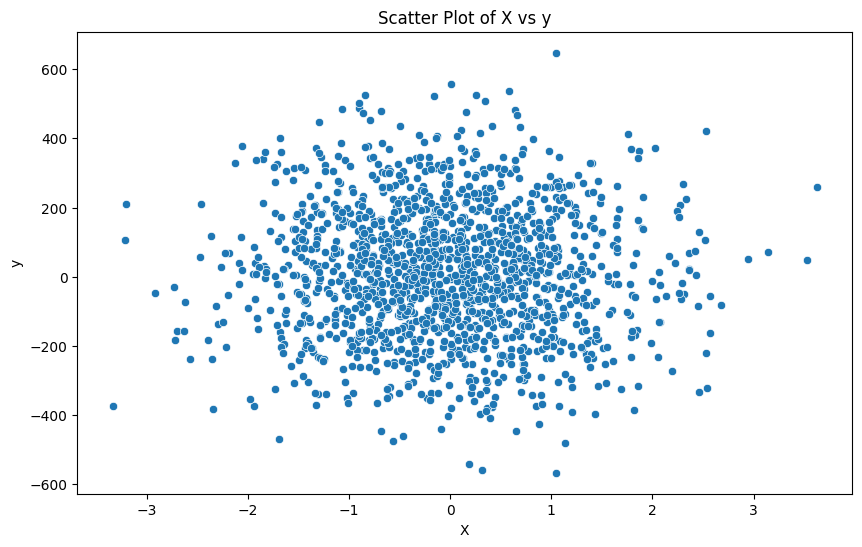

In [10]:
# Separating features and target variable
X = data.drop(columns=["y"])
y = data["y"]

# Plotting X against y
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=y)
plt.title("Scatter Plot of X vs y")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Splitting into train and test sets

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 200), (300, 200), (1200,), (300,))

Checking the RMSE and MSE before Feature selection

In [12]:
# Use Ridge Regression for modelling
ridge = RidgeCV(alphas=[0.1, 0.01, 0.001], cv=5)
ridge.fit(X_train, y_train)
ridge.alpha_
ridge.coef_
ridge.intercept_

# Predicting on the test set
y_pred = ridge.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.011038289051191575
Root Mean Squared Error: 0.10506326213854002
R^2 Score: 0.9999997092418642


In [13]:
# Setting different regularization strengths and 5 cross-validation folds
# Lasso regression for feature selection
lasso = LassoCV(alphas=[0.1, 0.01, 0.001], cv=5)
lasso.fit(X_train, y_train)
lasso.alpha_
lasso.coef_
lasso.intercept_

# Get the features selected by Lasso
lasso_features = pd.Series(lasso.coef_, index=X.columns)
lasso_features = lasso_features[lasso_features != 0]
print(len(lasso_features))
lasso_features

11


X6      88.063569
X17     27.810969
X28      3.371564
X52     89.102890
X89     -0.002263
X91     36.008092
X113    76.605021
X144    62.789080
X161    13.764412
X166    58.644139
X181    60.470261
dtype: float64

In [14]:
# Use Ridge Regression for modelling
#  using the features selected in the Lasso Regression

ridge = RidgeCV(alphas=[0.1, 0.01, 0.001], cv=5)
ridge.fit(X_train[lasso_features.index], y_train)
ridge.alpha_
ridge.coef_
ridge.intercept_

# Predicting on the test set
y_pred = ridge.predict(X_test[lasso_features.index])

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.01004639130675814
Root Mean Squared Error: 0.10023168813682697
R^2 Score: 0.9999997353693136


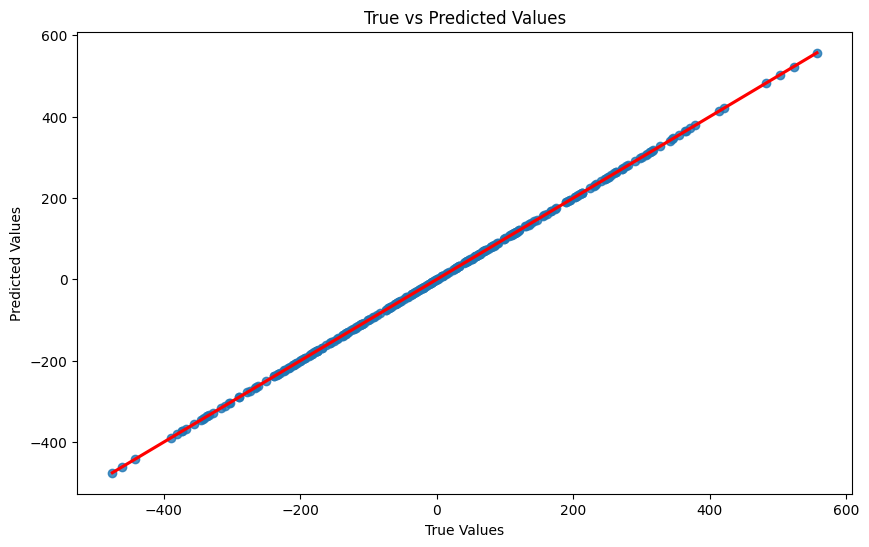

In [15]:
# Plotting the line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


This plot aligns with the values we got as we see we have an error rate of about 1% thus the true and predicted values pretty much align